<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/ARIMA-Monthly-Champagne-Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install latest statsmodel library v0.13
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 19.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
# Easiest Way to get file uploaded to Google Colab environment
from google.colab import files
file = files.upload()

Saving champagne.csv to champagne.csv


# End To End ARIMA Sample Using Boston Armed Robery Dataset - Ch30
**Problem Description** - Ch 32.2

**Test Harness** - Ch 32.3

**Persistence Model for Comparison Purposes** - Ch 32.4

**Data Analysis** - Ch 32.5

**ARIMA Model** - Ch 32.6

**Model Validation** - Ch 31.7

# Problem Description
- Predict the number of monthly sales of champagne for the Perrin Freres label
- Provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data
- Units: The values are a count of millions of sales
- There are 105 observation, the final year of data will be used for validation (oot)
- The problem will use Rolling Forecast type model

# Test Harness
**Evaluation Method**
- Evaluate the performance of predictions using Root Mean Squared (RMSE) - This will give more weight to predictions that are grossly wrong and will have same unit as original data
- Any transformations to the data (e.g. box-cox) must be reversed before RMSE is calculated and calculated & reported to make the performance between different mothods directly comparable
- The dataset is not current therefore the final 12 months of data will be withheld to validate for the final model.
- Will use walk-forward validation will be used for model evaluation i.e. one-step forecasts are needed given all the available data

**Test Strategy**
- Walk forward validation will work as follows:
 - 50% of data will be held back for training the model
 - Remaining 50% of the dataset will be iterated and used to test the model
- For each step in the Test dataset:
 - A model will be trained
 - A one-step prediction made and the prediction stored for later evaluation
 - The actual observation from the test dataset will be added to the training dataset for the next iteration
- the redictions made during the iteration of the test dataset will be evaluated and RMSE score reported
- Given the small size of the dataset we will allow a model to be re-trained given all available data prior to each prediction

In [5]:
import pandas as pd

series = pd.read_csv('champagne.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
split_point = len(series) - 12
dev_champagne_sales, oot_champagne_sales = series[0:split_point], series[split_point:]
print('dev_champagne_sales %d, oot_champagne_sales %d' % (len(dev_champagne_sales), len(oot_champagne_sales)))
dev_champagne_sales.to_csv('dev_champagne_sales.csv')
oot_champagne_sales.to_csv('oot_champagne_sales.csv')
print(series.describe())

dev_champagne_sales 93, oot_champagne_sales 12
count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64


# Persistence Model for Comparison Purproses

In [ ]:
# evaluate persistence model on time series
import pandas as pd
from sklearn.metrics import mean_squared_error
import math as ml

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  yhat = history[-1]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%3.f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = ml.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# Conclusion: An RMSE value of 3186.501 means that on average the model was wrong by about 3186 million of sales (per month) for each prediction made


>Predicted=5428, Expected=8314
>Predicted=8314, Expected=10651
>Predicted=10651, Expected=3633
>Predicted=3633, Expected=4292
>Predicted=4292, Expected=4154
>Predicted=4154, Expected=4121
>Predicted=4121, Expected=4647
>Predicted=4647, Expected=4753
>Predicted=4753, Expected=3965
>Predicted=3965, Expected=1723
>Predicted=1723, Expected=5048
>Predicted=5048, Expected=6922
>Predicted=6922, Expected=9858
>Predicted=9858, Expected=11331
>Predicted=11331, Expected=4016
>Predicted=4016, Expected=3957
>Predicted=3957, Expected=4510
>Predicted=4510, Expected=4276
>Predicted=4276, Expected=4968
>Predicted=4968, Expected=4677
>Predicted=4677, Expected=3523
>Predicted=3523, Expected=1821
>Predicted=1821, Expected=5222
>Predicted=5222, Expected=6872
>Predicted=6872, Expected=10803
>Predicted=10803, Expected=13916
>Predicted=13916, Expected=2639
>Predicted=2639, Expected=2899
>Predicted=2899, Expected=3370
>Predicted=3370, Expected=3740
>Predicted=3740, Expected=2927
>Predicted=2927, Expected=3986


**Conclusion**
- An RMSE value of 3186.501 means that on average the model was wrong by about 3186 million of sales (per month) for each prediction made

# Data Analysis
1) Summary Statistics

2) Line Plot & Seasonal Line Plots

3) Density Plot

4) Box & Whisker Plot comparing Annual Data Trends

5) Stationary Data test

6) ACF & PACF Auto-Correlation Plots

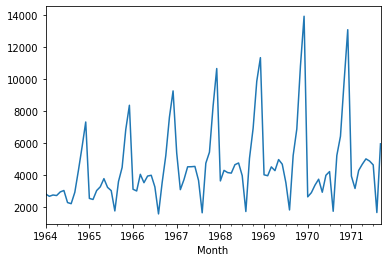

In [ ]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

**Line Plot Observations**
- There may be an increasing trend of sales over time
- There appears to be systematic seasonality to the sales for each year
- The seasonal signal appears to be growing over time, suggesting a multiplicative relationship (increasing change)
- There does not appear to be any obvious outliers
- The seasonality suggests that the series is almost certainly non-stationary
- There may be benefit in explicitly modelling the seasonal component and removing it.
- You could also explore using differencing with one or two levels in order to make the series stationary
- The increasing trend or growth in the seasonal component may suggest the use of a log or other power transform

**Additional analysis - Seasonal Line Plots**
- We can confirm the assumption that the seasonality is a yearly cycle by eyeballing line plot of dataset by year.
- The example provides the full 7 years of data as separate groups and creates one line plot for each.
- the line plots are aligned vertically to help spot any yesar-to-year pattern

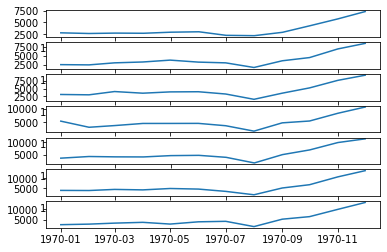

In [ ]:
import pandas as pd
from matplotlib import pyplot

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# data preparation
groups = series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100) + 10 + i)
  i += 1
  pyplot.plot(group)
pyplot.show()

**Seasonal Line Plot Observations**
- We can claerly see a dip each August and a rise from each August to December
- This pattern appears the same each year, although a different levels.
- This will help with any explicitly season-based modelling later
- Enhancement: It might have been easier if all season line plots were added to the one graph (in different colours) to help contrast the data for each year

**Density Plot**

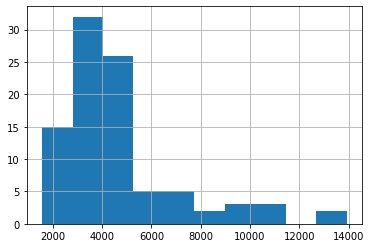

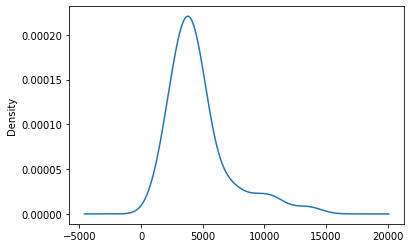

In [ ]:
# Density plot
import pandas as pd
from matplotlib import pyplot

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# History plot
series.hist()
pyplot.show()
# Density plot
series.plot(kind='kde')
pyplot.show()


**Density Plot Observations**
- The plot is not Gaussian
- The shape has a long right tail and may suggest an exponential distribution

**Conclusion**
- This lends more support to exploring some power transforms of the data prior to modelling


**Box and Whisker Plot**
- Only 1964 to 1970 was considered
- The last year (1970) was ignored because it only contained 9 months of data.

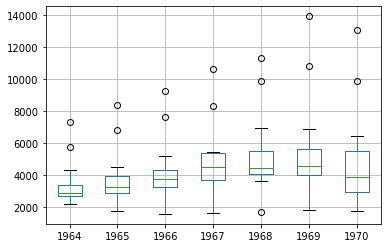

In [ ]:
import pandas as pd
from matplotlib import pyplot

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()

**Density Plot Observations**
- The median value for each year (green line) may show an increasing trend (except 1970)
- The spread or middle 50% of the data (blue boxes) does appear reasonably stable
- There are outliers each year (black crosses); these may be the tops or bottoms of the seasonal cycle
- The last year, 1970 does look different from the trend in the prior years

**Summary**
- Observations suggest perhaps some growth trend over the years & outliers may be a part of the seasonal cycle
**Additional Analysis**
- This yearly view of the data is an interesting avenue & could be persued further by looking at summary statistics from year-to-year and changes in summary stats from year-to-year

# ARIMA Model
- Create and Test for Stationary Data
- Augmented Dickey Fuller Test
- ACF & PACF Auto_Correlation Plots
- Manual Prediction
- Grid Search
- Review Residual Errors

**Create and Test for Stationary Data**

- By Differencing Data & then Checking augmented Dickey-Fuller Stats test & determine the value for d (p, d, q)
- In the plots above seasonality is year-to-year i.e. differencing is the same month in the previous year
- We will lose the 1st year of observations as there is no prior year to difference

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


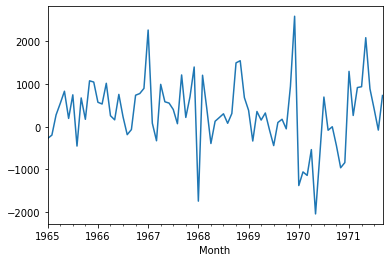

In [ ]:
# create and summarise stationary version of time series
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

# create a differenced series
# Function caters for variable intervals
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i-interval]
    diff.append(value)
  return pd.Series(diff)

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()


**Auto Correlation Plots - ACF & PACF**

To determine lag values for AR & MA paerameters p & q

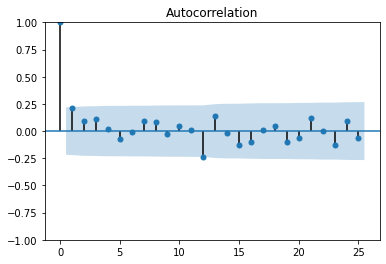

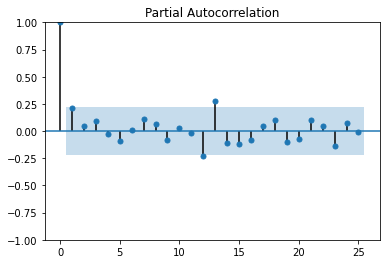

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

# load data
series = pd.read_csv('stationary.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=25)
pyplot.show()
plot_pacf(series, lags=25, method='ywm')
pyplot.show()

# Correlation Plot Observations
# The ACF shows a significant lag for 1 month
# The PACF shows a significant lag for 1 month, with perhaps some significant lag at months 12 & 13
# Both the ACF & PACF show a drop-off at the same point, perhaps suggesting a mix of AR & MA


**Correlation Plot Observations**
- The ACF shows a significant lag for 1 month
- The PACF shows a significant lag for 1 month, with perhaps some significant lag at months 12 & 13
- Both the ACF & PACF show a drop-off at the same point, perhaps suggesting a mix of AR & MA

**ARIMA Model - Manual Prediction of Parameters**

**Summay**
- Quick analysis suggests that an ARIMA(1,0,1) on the stationary data may be a good starting point but the model proved unstable and adding 1 level of differencing made the model more stable i.e. ARIMA(1,1,1).
- Experimentation (& experience) disabling the automatic addition of the trend constant to nc for 'no constant' in the call to Fit() can also result in better forecast performance on some problems.
- The historic observations will be seasonally differenced prior to the fitting of each ARIMA model.
- The differencing will be inverted for all predictions made to make them directly comparable to the expected observation in the orginal sales count units

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import math as ml

# create differenced series for seasonal trend
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # differenced data
  months_in_year = 12
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(1,1,1))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observations
  obs = test[1]
  history.append(obs)
  print('>Predictd=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = ml.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predictd=7340.000, Expected=10651.000
>Predictd=8980.000, Expected=10651.000
>Predictd=5101.000, Expected=10651.000
>Predictd=2814.000, Expected=10651.000
>Predictd=3444.000, Expected=10651.000
>Predictd=4240.000, Expected=10651.000
>Predictd=4246.000, Expected=10651.000
>Predictd=4265.000, Expected=10651.000
>Predictd=3389.000, Expected=10651.000
>Predictd=1369.000, Expected=10651.000
>Predictd=4465.000, Expected=10651.000
>Predictd=5154.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10377.000, Expected=10651.000
>Predictd=10

**ARIMA Model - Grid Search Parameters**

In [ ]:
import warnings
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math as ml
import numpy as np

# create a differenced series
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)): 
    value = dataset[i] - dataset[i - interval] 
    diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    model = ARIMA(diff, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = ml.sqrt(mean_squared_error(test, predictions))
  print('evaluate arima model output')
  print('rmse: %.3f' % rmse)
  return rmse

# evaluate combinations of p, d and q for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          print('evaluate models')
          print(order)
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

evaluate models
(0, 0, 0)
evaluate models
(0, 0, 1)
evaluate models
(0, 0, 2)
evaluate models
(0, 0, 3)
evaluate models
(0, 0, 4)
evaluate models
(0, 0, 5)
evaluate models
(0, 0, 6)
evaluate models
(0, 1, 0)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 1)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 2)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 3)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 4)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 5)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 1, 6)
evaluate arima model output
rmse: 1036.539
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 2, 0)
evaluate arima model output
rmse: 1106.004
ARIMA(0, 1, 0) RMSE=1036.539
evaluate models
(0, 2, 1)
evaluate

**Model Evaluation - Review Residual Errors**

Histogram, Density, ACF & PACF of Residual Errors

                 0
count    47.000000
mean     38.361702
std    1951.289957
min   -5602.000000
25%    -546.000000
50%      31.000000
75%     931.000000
max    6085.000000


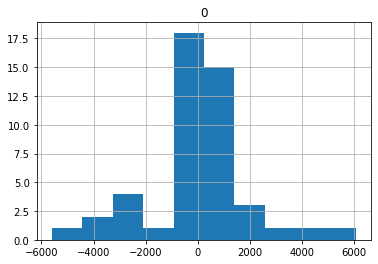

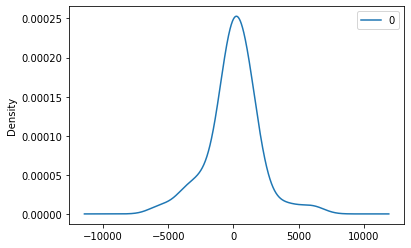

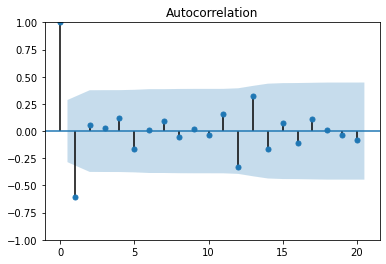

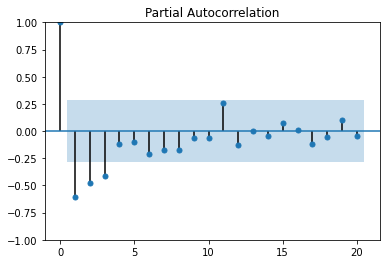

In [ ]:
# summarise ARIMA forecast residuals
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot


# create a seasonally difference series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return (yhat + history[-interval])

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
#residuals = list()
months_in_year = 12
for t in range(len(test)):
  # difference data
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(0,1,0))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observation
  obs = test[t]
  history.append(obs)
# errors
#  residual = obs - predictions[t]
#  residuals.append(residual)
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# Plot
residuals.hist()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

plot_acf(residuals, lags=20)
pyplot.show()
plot_pacf(residuals, lags=20, method='ywm')
pyplot.show()


**Observations Residual Errors**
- The graph suggests a Guassian like distribution
- Mean is non zero at 10.914894

**Summary**
- Could try bias-correction by adding the mean residual error of 10.914894 to each forecast made
- A power transform might be worth exploring

**Bias Correction by adding Residual Error to forecasts**

                  0
count  4.700000e+01
mean  -3.829784e-07
std    1.158259e+03
min   -3.972915e+03
25%   -4.944149e+02
50%    6.508511e+01
75%    6.175851e+02
max    2.935085e+03
RMSE: 1145.871


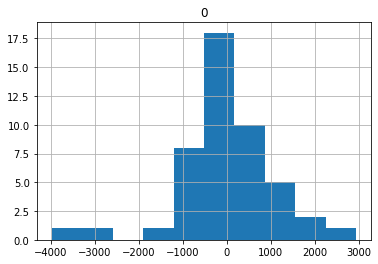

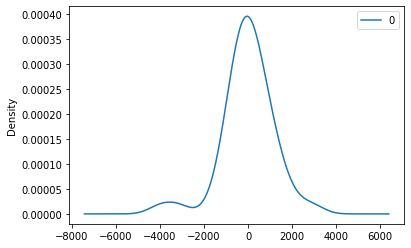

In [ ]:
# plots of residual errors of bias corrected forecasts
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import math as ml

# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# inverse of differenced value
def inverse_difference(history, yhat, interval):
  return yhat + history[-interval]

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk forward validation
history = [x for x in train]
predictions = list()
residuals = list()
bias = 10.914894
for i in range(len(test)):
  # difference data
  months_in_year = 12
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(0,1,0))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  # plus bias
  yhat = bias + inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observations
  obs = test[i]
  history.append(obs)
  # errors
  residual = obs - predictions[i]
  residuals.append(residual)
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# report performance
rmse = ml.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# plot
residuals.hist()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()



**Bias Summary**

Will not use bias correction as root mean square error is larger than non bias correction equation

# Model Validation
- Finalize Model
- Make Prediction using oot data
- Validate Model

**Finalize Model**

Train & save final model using entire (train & test) dataset

In [7]:
# save finalised model
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# create seasonaly difference dataset
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,1,0))
model_fit = model.fit()
model_fit.save('model.pkl')

**Making Predictions**

Load the saved (finalised) model and make single forecast

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMAResults

# perform inverse difference of dataset
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# load data
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 7154.000


**Summary**
- Looking at the next value in validation.csv we can see that the value on the first row for the next time period is 6981 (in the right ball park)

**Validate Model**

Load & validate the final model with oot data

Predicted=7154.000, Expected=6981.000
Predicted=9568.000, Expected=9851.000
Predicted=12802.000, Expected=12670.000
Predicted=3660.000, Expected=4348.000
Predicted=2888.000, Expected=3564.000
Predicted=4012.000, Expected=4577.000
Predicted=4402.000, Expected=4788.000
Predicted=4736.000, Expected=4618.000
Predicted=4600.000, Expected=5312.000
Predicted=4359.000, Expected=4298.000
Predicted=1385.000, Expected=1413.000
Predicted=5677.000, Expected=5877.000
RMSE: 417.468


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in true_divide
  (self.nobs - self.ssm.loglikelihood_burn)


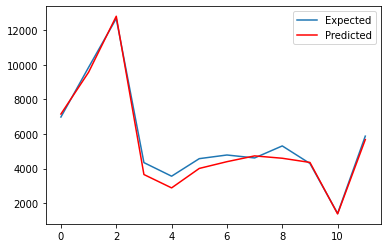

In [12]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error
import math as ml

# create difference dataset
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
    return diff

def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# load and prepare dataset
series = pd.read_csv('dev_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
oot = pd.read_csv('oot_champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# data preparation
X = series.values.astype('float32')
history = [x for x in X]
expected_y = oot.values.astype('float32')
# load saved model
model_fit = ARIMAResults.load('model.pkl')
# make first prediction
predictions = list()
residuals = list()
yhat = model_fit.forecast()[0]
yhat = inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(expected_y[0])
print('Predicted=%.3f, Expected=%.3f' % (yhat, expected_y[0]))
# rolling forecast
months_in_year = 12
for i in range(1, len(expected_y)):
  # difference data
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(0,1,0))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observation
  obs = expected_y[i]
  history.append(obs)
  print('Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = ml.sqrt(mean_squared_error(expected_y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(expected_y, label='Expected')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
